In [1]:
# %matplotlib inline

In [2]:
from harissa_benchmark import ScoresGenerator, available_networks, available_inferences
from harissa_benchmark.generators import DatasetsGenerator
from harissa_benchmark.plotter import InteractionPlotter
from harissa.plot import build_pos, plot_network

print(available_networks())
print(available_inferences())

['FN4', 'FN8', 'Trees5', 'Trees10', 'Trees20', 'Trees50', 'Trees100', 'BN8', 'CN5']
['Hartree']


In [3]:
gen = ScoresGenerator(path='datagen')

# for name, network in gen.networks_generator.networks.items():
#     print(f'{name}:')
#     plot_network(network.interaction, build_pos(network.interaction))

Loading Hartree scores for CN5 network. |▶▶▶▶▶▶▶             | 🌶      0 in 0s (0.0/s)              

In [4]:
gen.generate()

In [ ]:
show_networks = True
networks = dict(sorted(gen.generators[0].networks_generator.networks.items()))
nb_networks = len(networks)

networks_pos = [
    build_pos(network.interaction) for network in networks.values()
]


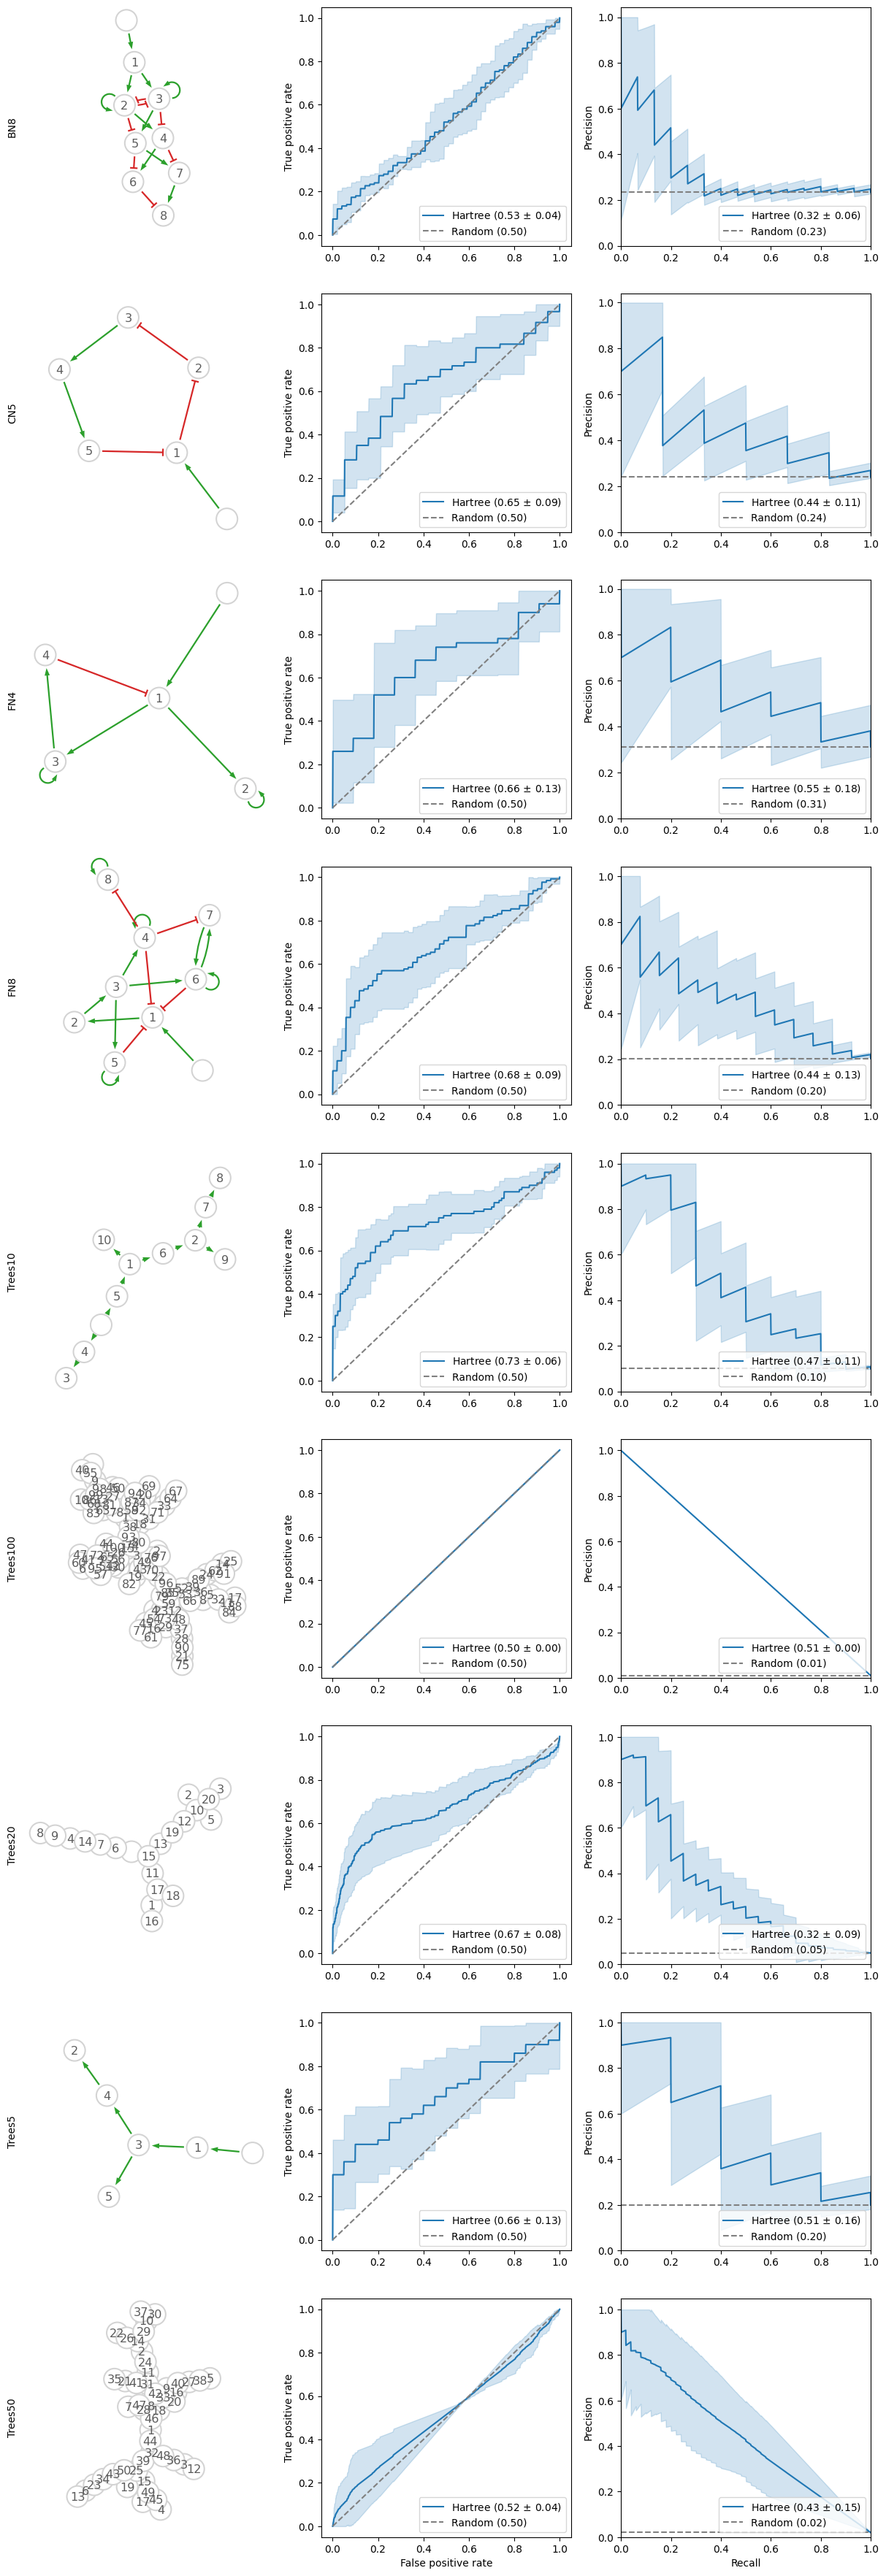

In [5]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

fig = plt.figure(figsize=(5*(2 + show_networks), 5*len(networks)), dpi=100)
grid = gs.GridSpec(nb_networks, 2 + show_networks)

for i, (net_name, network) in enumerate(networks.items()):
    plotter = InteractionPlotter(network)
    j = 0
    if show_networks:
        ax = fig.add_subplot(grid[i, j])
        plot_network(
            network.interaction, 
            networks_pos[i],
            axes=ax,
            scale=20
        )
        ax.set_ylabel(f'{net_name}')
        j = 1
    
    roc_ax = fig.add_subplot(grid[i, j+0])
    pr_ax = fig.add_subplot(grid[i, j+1]) 

    scores = gen.scores[net_name]
    plotter.plot_rocs(scores, roc_ax)
    plotter.plot_prs(scores, pr_ax)

    if i < nb_networks - 1:
        roc_ax.set_xlabel('')
        pr_ax.set_xlabel('')

fig.show(warn=False)
fig.savefig('figure_mean_curve.pdf')


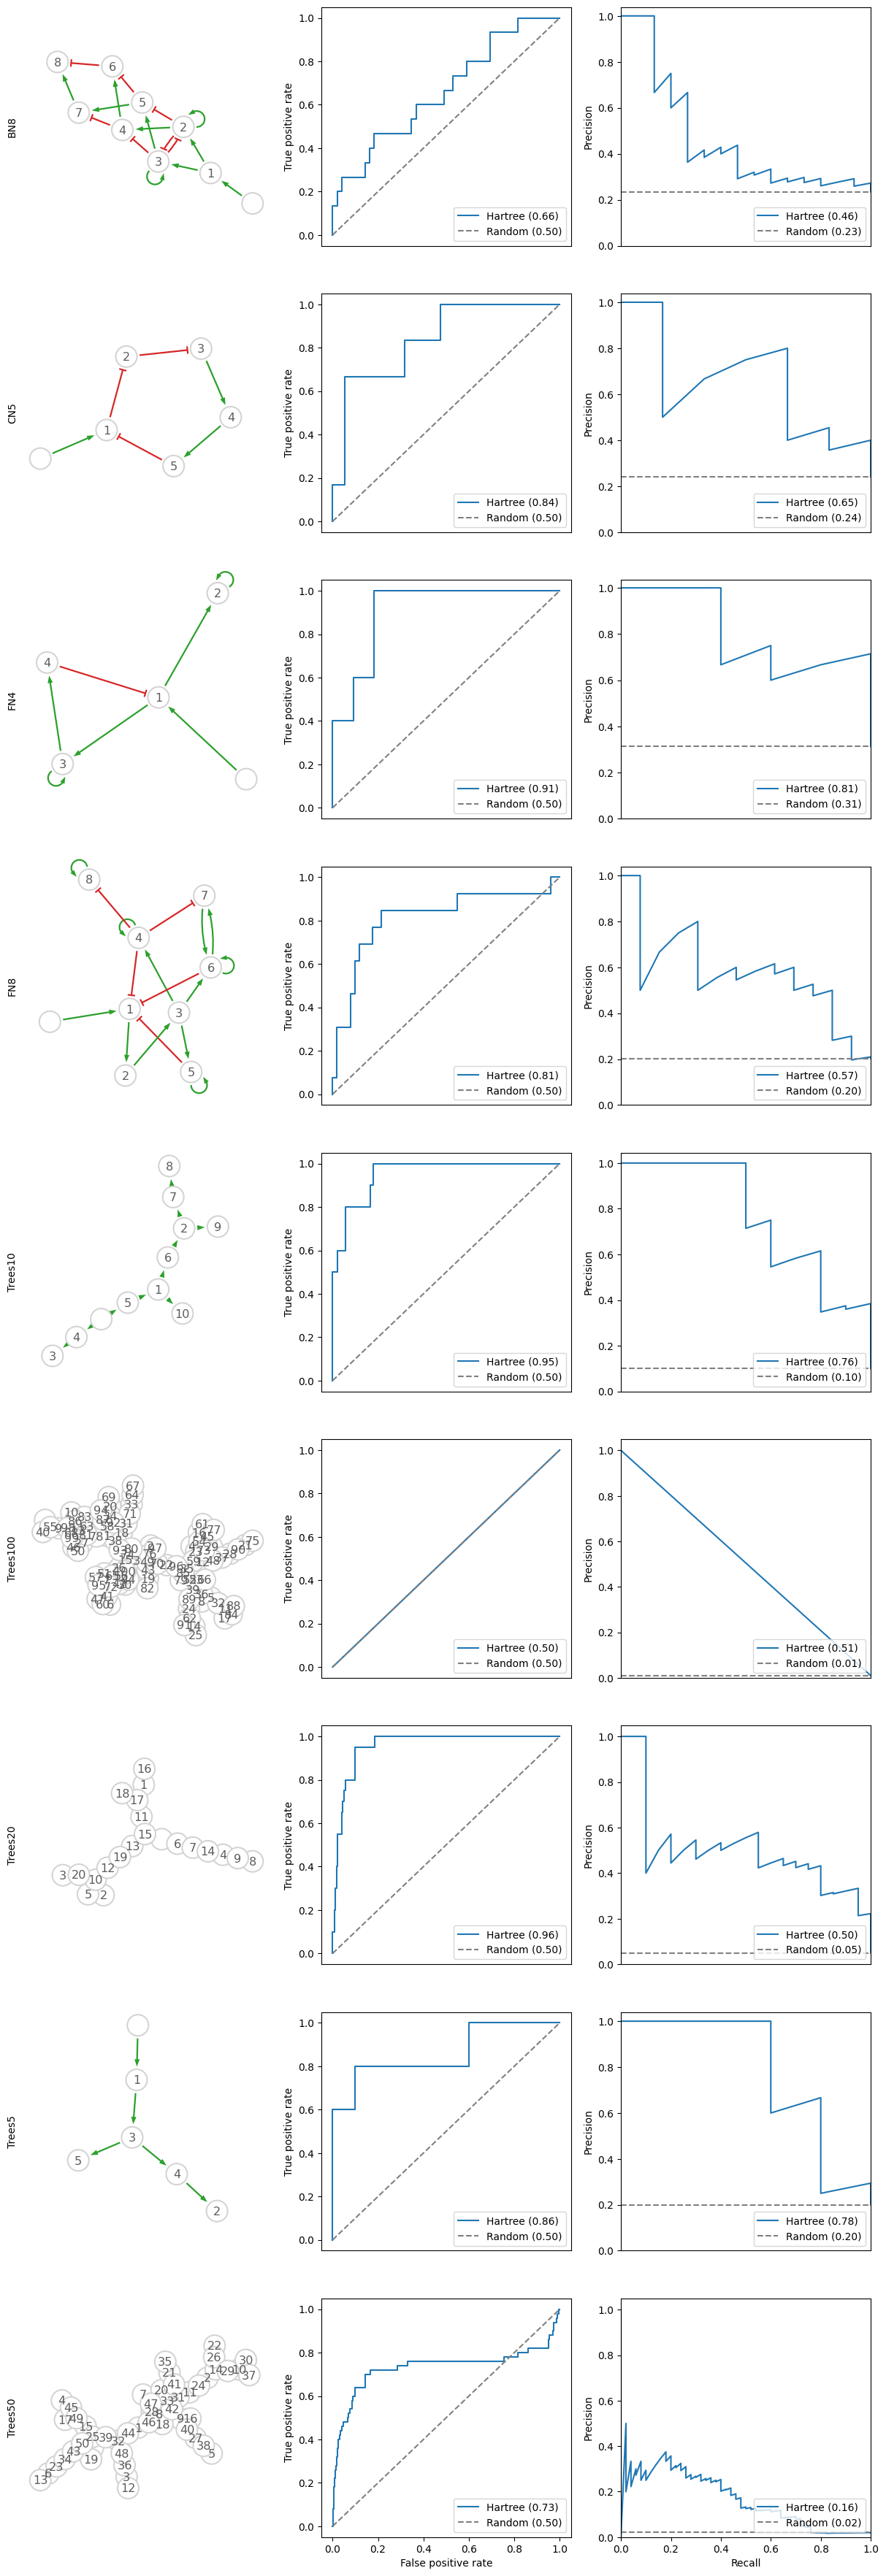

In [6]:
from itertools import accumulate
from harissa import NetworkParameter

fig = plt.figure(figsize=(5*(2 + show_networks), 5*len(networks)), dpi=100)
for i, (net_name, network) in enumerate(networks.items()):
    plotter = InteractionPlotter(network)
    mean_scores = {}
    for inf_name, (scores, runtimes) in gen.scores[net_name].items():
        mean_scores[inf_name] = (
            list(accumulate(
                scores,
                lambda s1, s2: (
                    s1.interaction if isinstance(s1, NetworkParameter) else s1
                ) + s2.interaction
            ))[-1] / len(scores), 
            np.mean(runtimes)
        )
    inters = {k:v for k, (v, _) in mean_scores.items()}
    j = 0
    if show_networks:
        ax = fig.add_subplot(grid[i, j])
        plot_network(
            network.interaction, 
            networks_pos[i],
            axes=ax,
            scale=20
        )
        ax.set_ylabel(f'{net_name}')
        j = 1
    roc_ax = fig.add_subplot(grid[i, j+0])
    pr_ax = fig.add_subplot(grid[i, j+1]) 

    plotter.plot_roc(inters, roc_ax)
    plotter.plot_pr(inters, pr_ax)

    if i < nb_networks - 1:
        roc_ax.get_xaxis().set_visible(False)
        pr_ax.get_xaxis().set_visible(False)

fig.show(warn=False)
fig.savefig('figure_mean_inter.pdf')

In [7]:
gen.save('datagen4')

Networks saved at /home/nseyler/Work/benchmark/datagen4/networks                                    
Saving datasets |███████▌            |  🌶     34/90 [38%] in 0s (~0s, 333.2/s)                      
Saving datasets |███████████▏        |   🌶    50/90 [56%] in 0s (~0s, 338.5/s)                      
Saving datasets |█████████████▌      |    🌶   61/90 [68%] in 0s (~0s, 337.7/s)                      
Saving datasets |██████████████      |     🌶  63/90 [70%] in 0s (~0s, 321.7/s)                      
Saving datasets |██████████████▋     |      🌶 66/90 [73%] in 0s (~0s, 300.9/s)                      
Saving datasets |███████████████▌    |      🌶 70/90 [78%] in 0s (~0s, 280.2/s)                      
Saving datasets |████████████████▋   |     🌶  75/90 [83%] in 0s (~0s, 261.7/s)                      
Saving datasets |██████████████████▎ |    🌶   82/90 [91%] in 0s (~0s, 247.3/s)                      
Datasets saved at /home/nseyler/Work/benchmark/datagen4/datasets                           

PosixPath('datagen4/scores')